# Data Import

In [12]:
data <- read.csv("Placement_Data_Full_Class.csv") # the csv file stay in current working directory


In [10]:
sapply(data, function(x) sum(is.na(x)))

sl_no         gender            age        address           Medu 
             0              0              0              0              0 
          Fedu           Mjob           Fjob         famsup           paid 
             0              0              0              0              0 
    activities       internet          ssc_p          ssc_b          hsc_p 
             0              0              0              0              0 
         hsc_b          hsc_s       degree_p       degree_t         workex 
             0              0              0              0              0 
       etest_p specialisation          mba_p         status         salary 
             0              0              0              0           8265

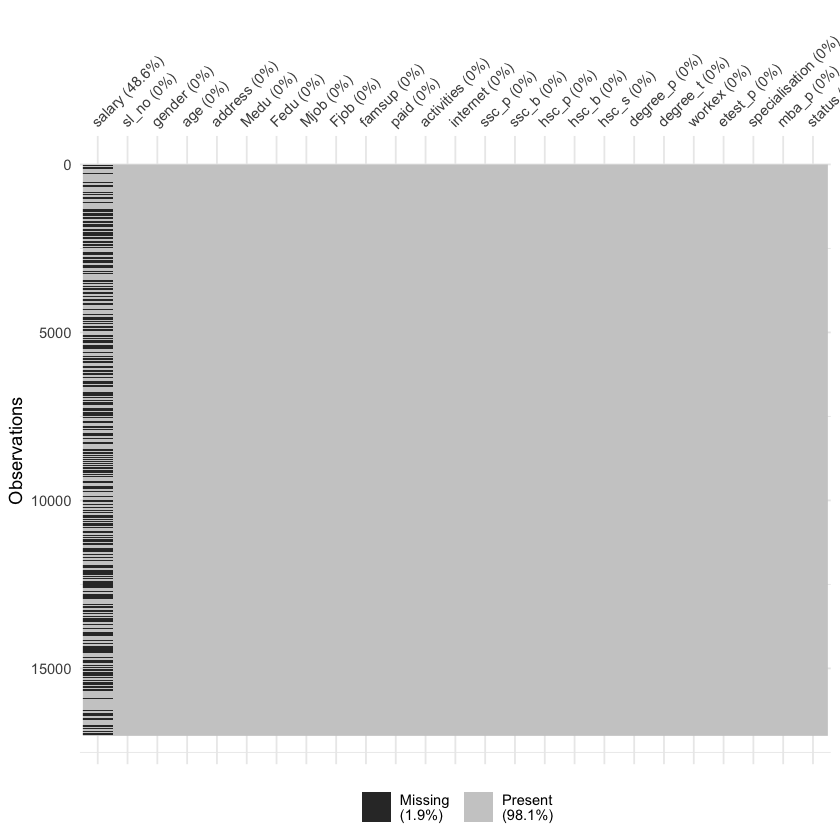

In [9]:
library(visdat)
vis_miss(data,sort_miss=T,warn_large_data=F)

In [12]:
str(data) # View the structure of dataset

'data.frame':	17007 obs. of  25 variables:
 $ sl_no         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ gender        : chr  "M" "M" "M" "M" ...
 $ age           : int  23 19 19 21 22 19 19 18 19 21 ...
 $ address       : chr  "U" "U" "U" "U" ...
 $ Medu          : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu          : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob          : chr  "at_home" "at_home" "at_home" "health" ...
 $ Fjob          : chr  "teacher" "other" "other" "services" ...
 $ famsup        : chr  "no" "yes" "no" "yes" ...
 $ paid          : chr  "no" "no" "yes" "yes" ...
 $ activities    : chr  "no" "no" "no" "yes" ...
 $ internet      : chr  "no" "yes" "yes" "yes" ...
 $ ssc_p         : num  67 79.3 65 56 85.8 ...
 $ ssc_b         : chr  "State" "State" "Private" "Central" ...
 $ hsc_p         : num  91 78.3 68 52 73.6 ...
 $ hsc_b         : chr  "State" "Central" "Private" "State" ...
 $ hsc_s         : chr  "Commerce" "Science" "Arts" "Science" ...
 $ degree_p      : num  58 77.5 64 52 73.3 ...

In [13]:
summary(data) # Summarize the data

     sl_no          gender               age          address         
 Min.   :    1   Length:17007       Min.   :18.00   Length:17007      
 1st Qu.: 4252   Class :character   1st Qu.:19.00   Class :character  
 Median : 8504   Mode  :character   Median :20.00   Mode  :character  
 Mean   : 8504                      Mean   :20.49                     
 3rd Qu.:12756                      3rd Qu.:22.00                     
 Max.   :17007                      Max.   :23.00                     
                                                                      
      Medu            Fedu           Mjob               Fjob          
 Min.   :0.000   Min.   :0.000   Length:17007       Length:17007      
 1st Qu.:2.000   1st Qu.:1.000   Class :character   Class :character  
 Median :3.000   Median :2.000   Mode  :character   Mode  :character  
 Mean   :2.513   Mean   :2.489                                        
 3rd Qu.:4.000   3rd Qu.:3.000                                        
 Max. 

The missing values are treated as random values

In [15]:
library(Hmisc)
data$salary <- impute(data$salary,"random") 

# Data Exploration and Analysis

Question 1: What is the relationship between the ssc_p and the hsc_p??

[1] 0.0019614

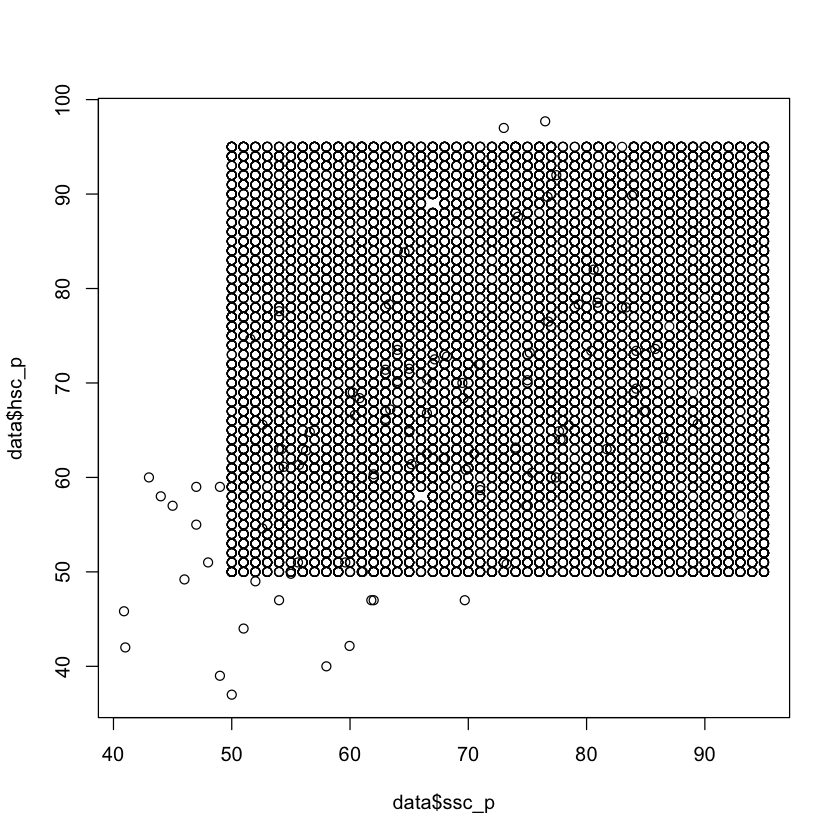

In [16]:
cor(data$ssc_p,data$hsc_p) #Calculate the correlation coefficient
plot(data$ssc_p,data$hsc_p) #Scatter plot

Question 2: What is the age and sex ratio in the data set?

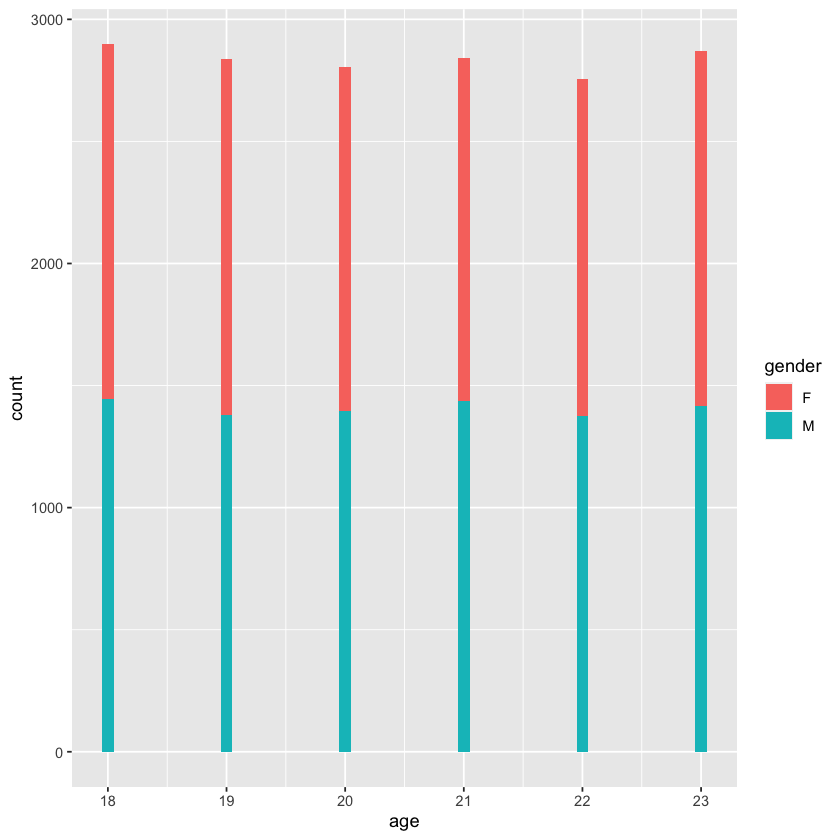

In [17]:
library(ggplot2)
ggplot(data,aes(age,fill=gender))+ 
  geom_histogram(binwidth=0.1) #Bar Graph of Student Age and sex

Question 3: What is the relationship between age and degree?

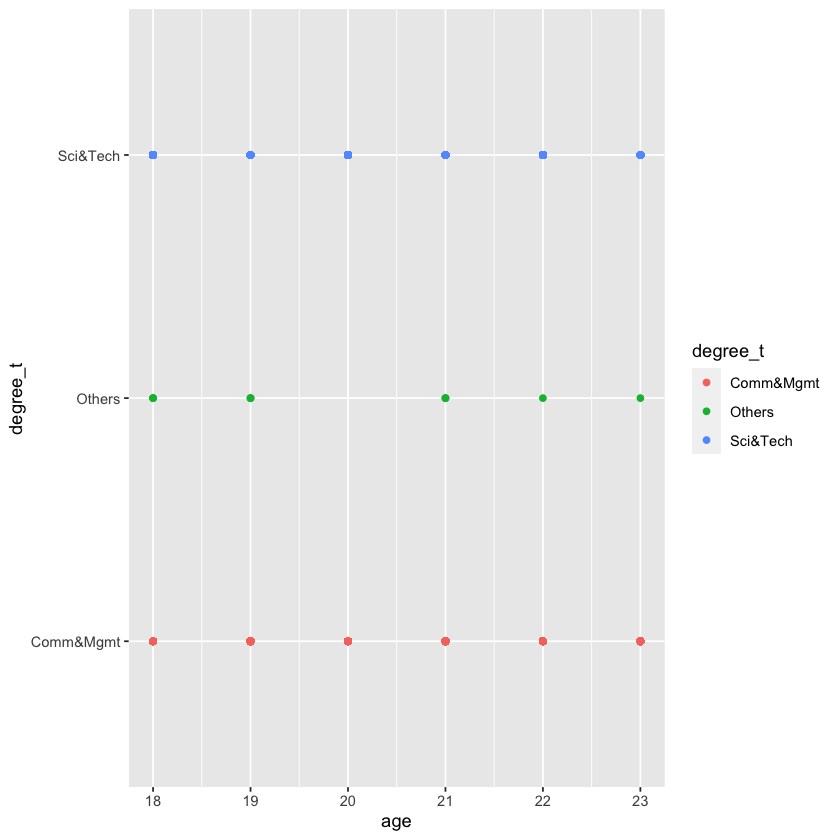

In [18]:
ggplot(data,aes(age,degree_t))+
  geom_point(aes(color=degree_t)) #Scatter plot

Question 4: Is the age and gender pay gap large?

Don't know how to automatically pick scale for object of type impute. Defaulting to continuous.



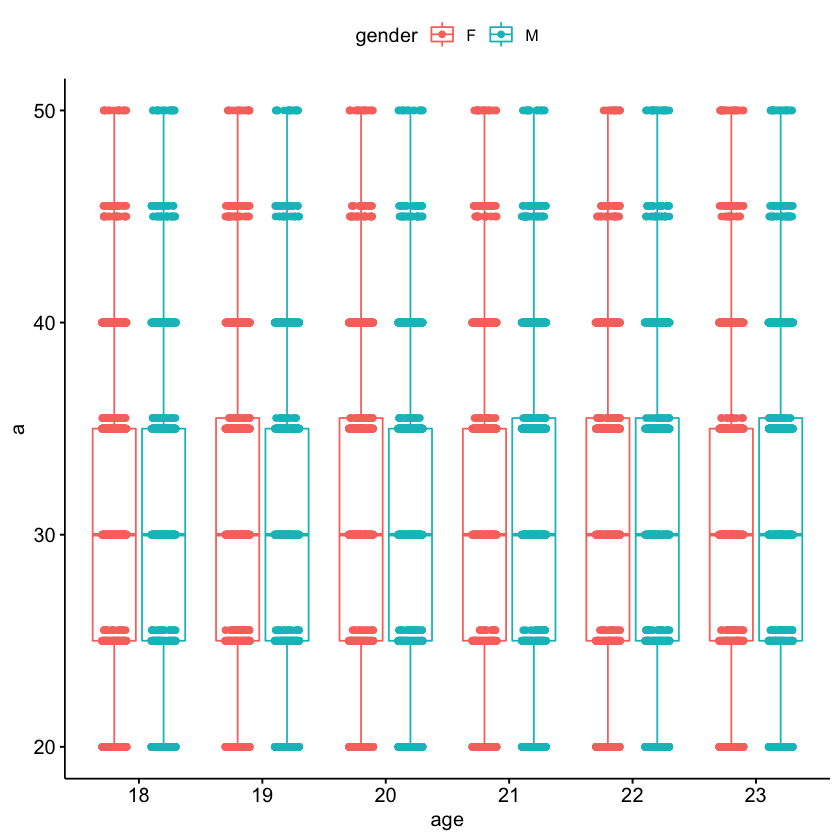

In [19]:
library(ggpubr)
a=data$salary/10000
ggboxplot(data,x="age",y="a",
          color="gender",add="jitter")

Question 5: What is the share of Mbas?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



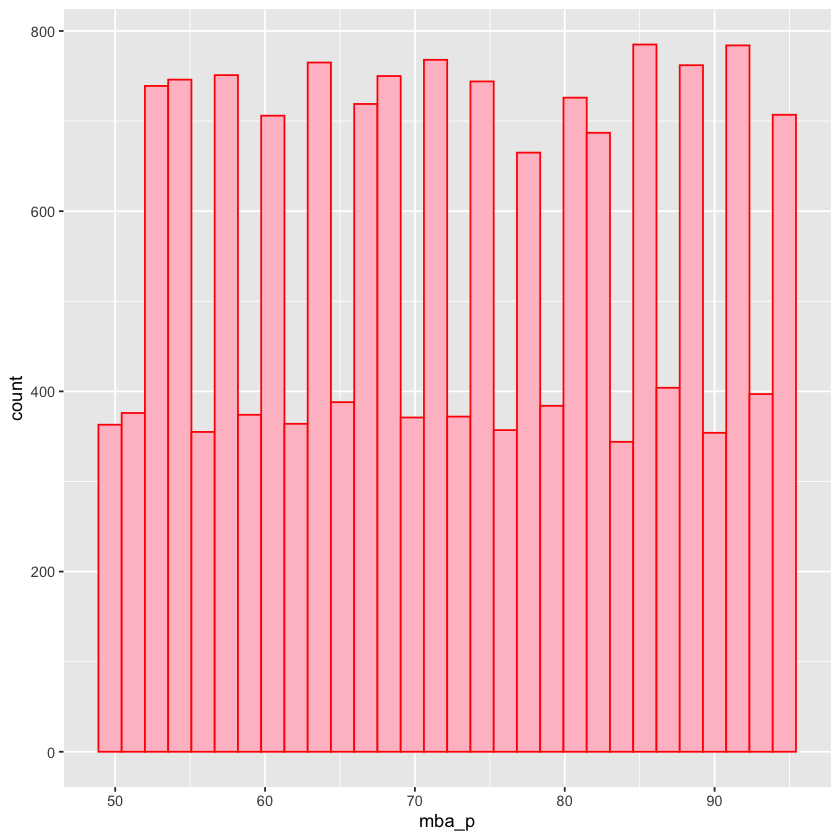

In [20]:
ggplot(data,aes(mba_p,transmission_type="Manual"))+
  geom_histogram(col="red",fill="pink")

Question 6: What About Fathers Working and mothers working?

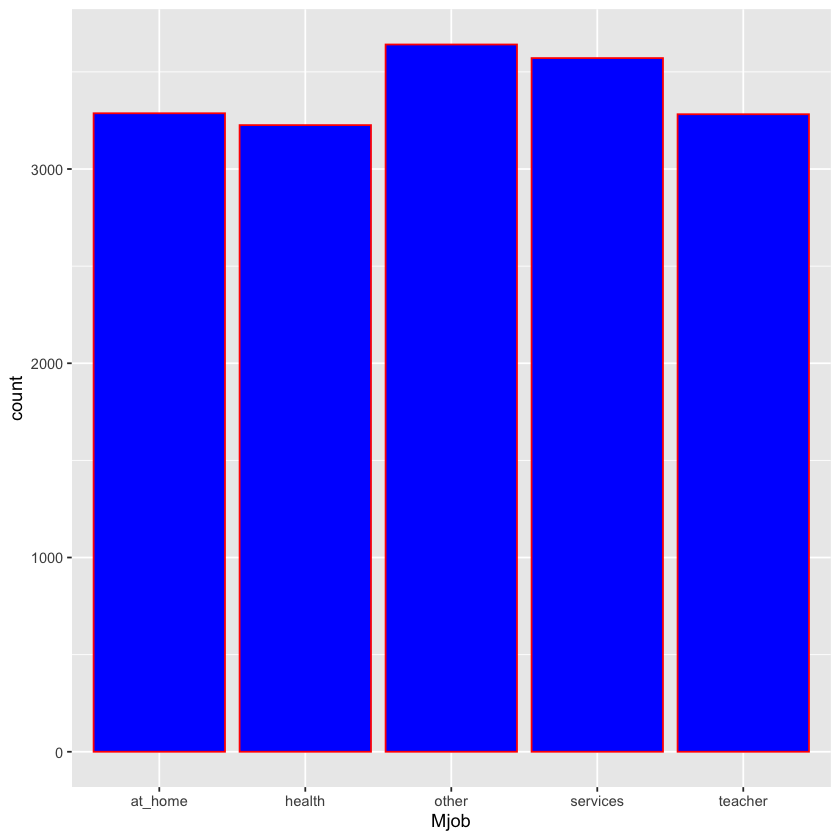

In [21]:
#Analysis6.1
ggplot(data,aes(Mjob))+
  geom_bar(col="red",fill="blue")

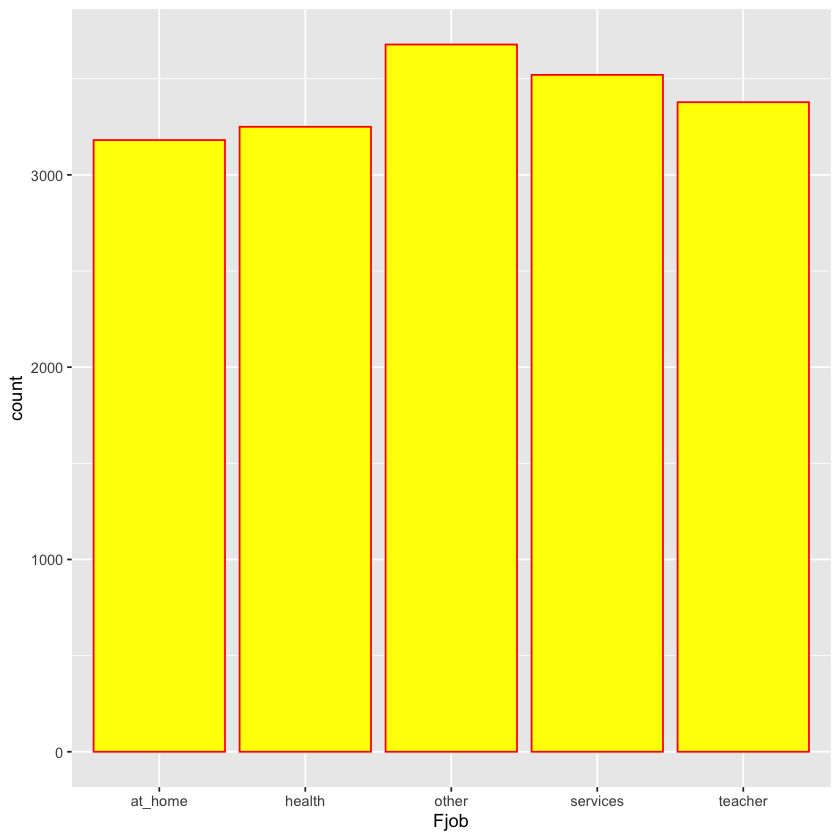

In [22]:
#Analysis6.2
ggplot(data,aes(Fjob))+
  geom_bar(col="red",fill="yellow")

Question 7: How does a parent??s job affect an mba_p?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



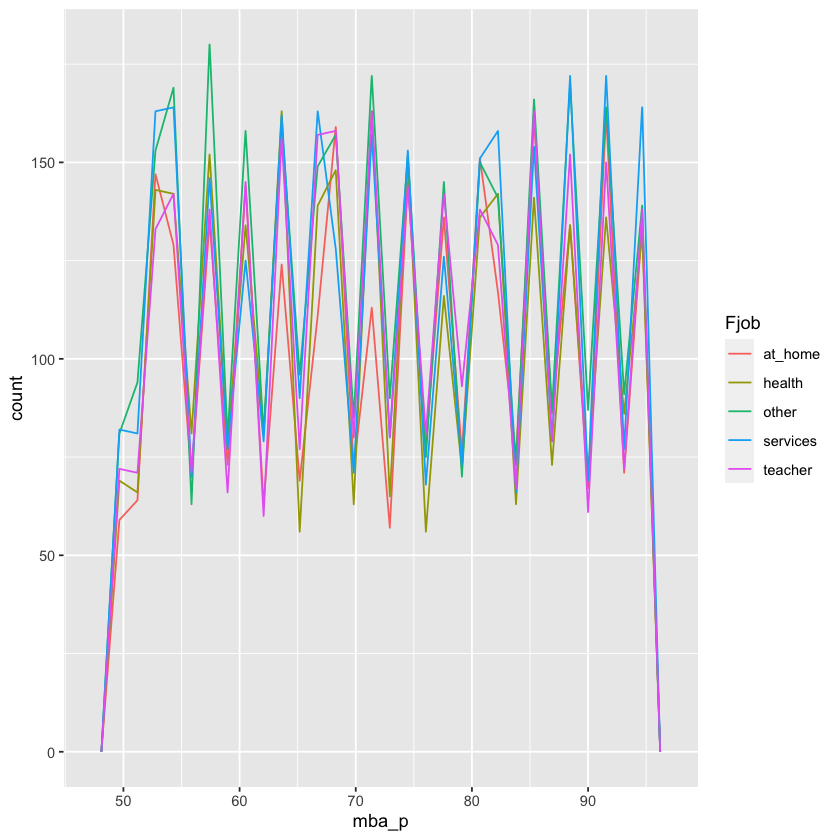

In [23]:
#Analysis7.1
ggplot(data,aes(mba_p,colour=Fjob))+
  geom_freqpoly()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



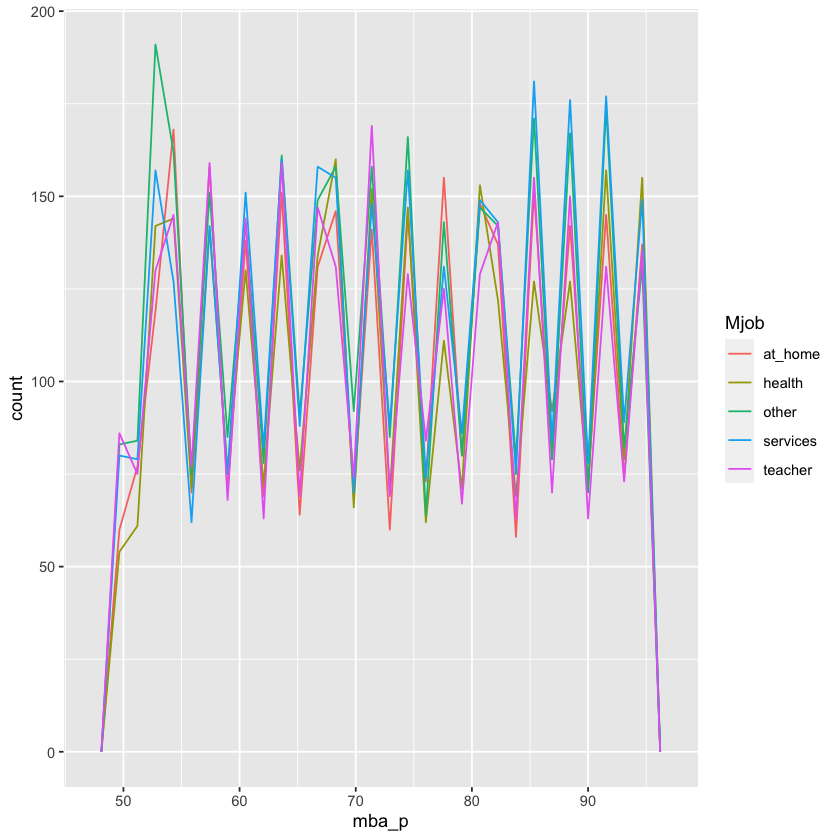

In [24]:
#Analysis7.2
ggplot(data,aes(mba_p,colour=Mjob))+
  geom_freqpoly()

Question8: Is the education of students greatly influenced by their families?

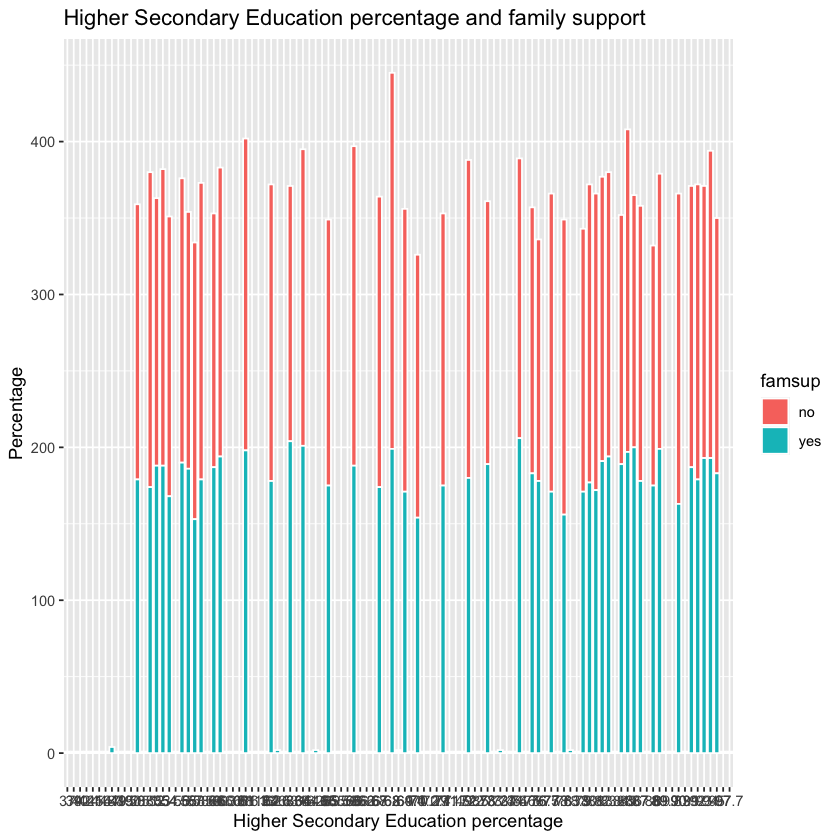

In [25]:
#Analysis8.1: The relationship between family educational support and Higher Secondary Education percentage
ggplot(data,aes(factor(hsc_p),fill=famsup))+
  geom_bar(width=0.8,color="white")+
  xlab("Higher Secondary Education percentage")+ylab("Percentage")+
  ggtitle("Higher Secondary Education percentage and family support")

`geom_smooth()` using formula 'y ~ x'



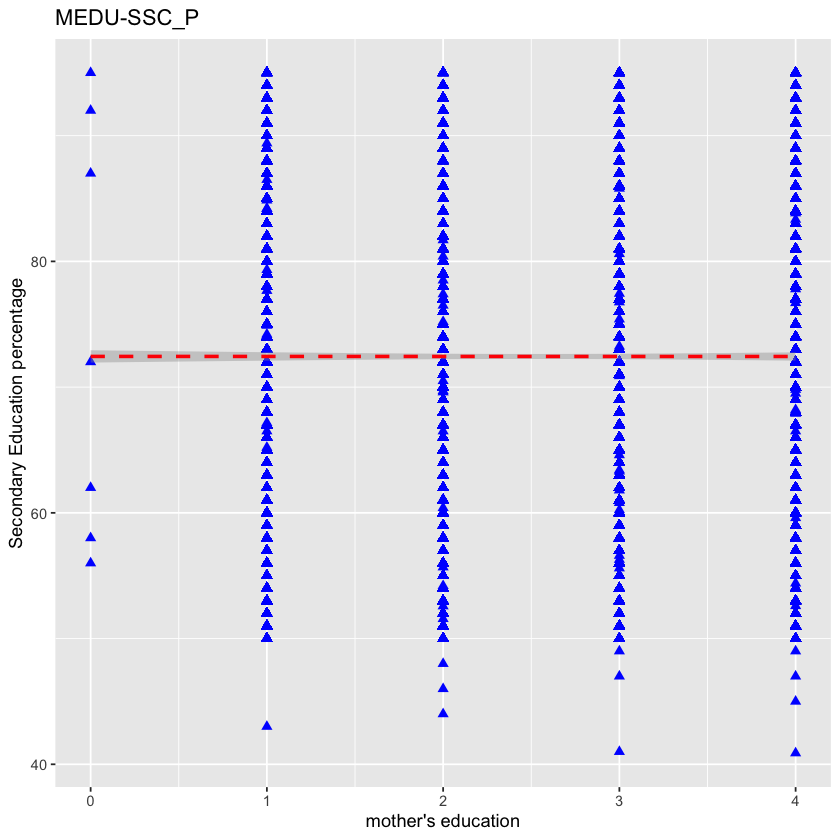

In [26]:
#Analysis8.2: The influence of Mother's Education on Secondary Education percentage
ggplot(data, aes(x=Medu,y=ssc_p))+
  geom_point(pch=17, color="blue", size=2) +
  geom_smooth(method = "lm", color="red", linetype=2) +
  labs(title="MEDU-SSC_P", x="mother's education", y="Secondary Education percentage")

`geom_smooth()` using formula 'y ~ x'



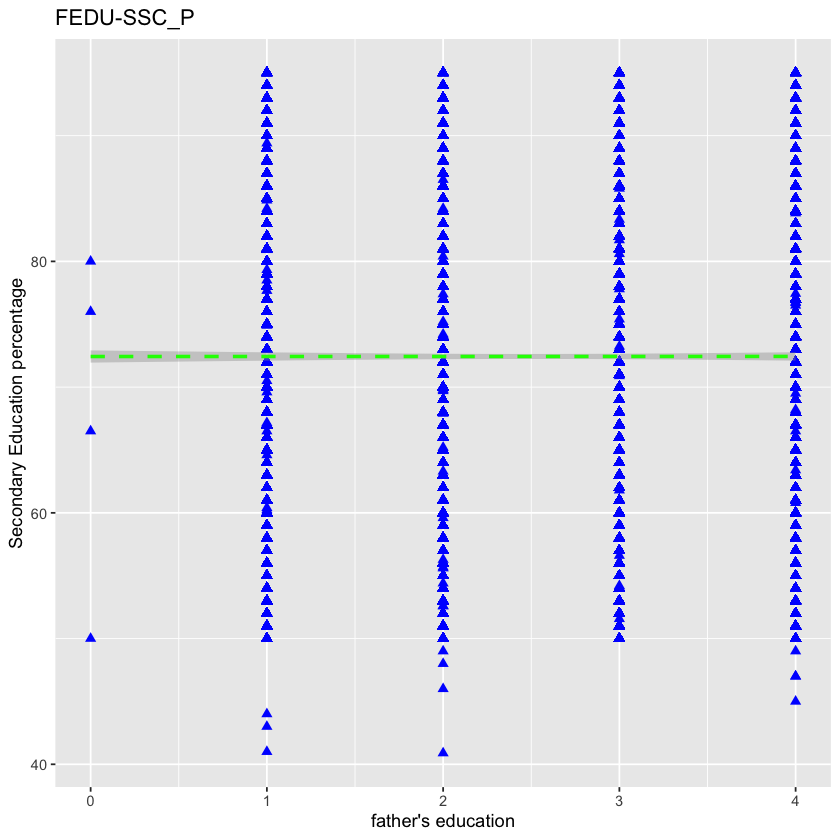

In [27]:
#Analysis8.3: The influence of Father's Education on Secondary Education percentage
ggplot(data, aes(x=Fedu,y=ssc_p))+
  geom_point(pch=17, color="blue", size=2) +
  geom_smooth(method = "lm", color="Green", linetype=2) +
  labs(title="FEDU-SSC_P", x="father's education", y="Secondary Education percentage")

Question9: What are the factors related to salary?

In [28]:
install.packages("ggthemes")
library("ggthemes")


The downloaded binary packages are in
	/var/folders/y5/qrg0w83n1wz2rbkd0qsff_q80000gp/T//Rtmp5h163T/downloaded_packages


Don't know how to automatically pick scale for object of type impute. Defaulting to continuous.



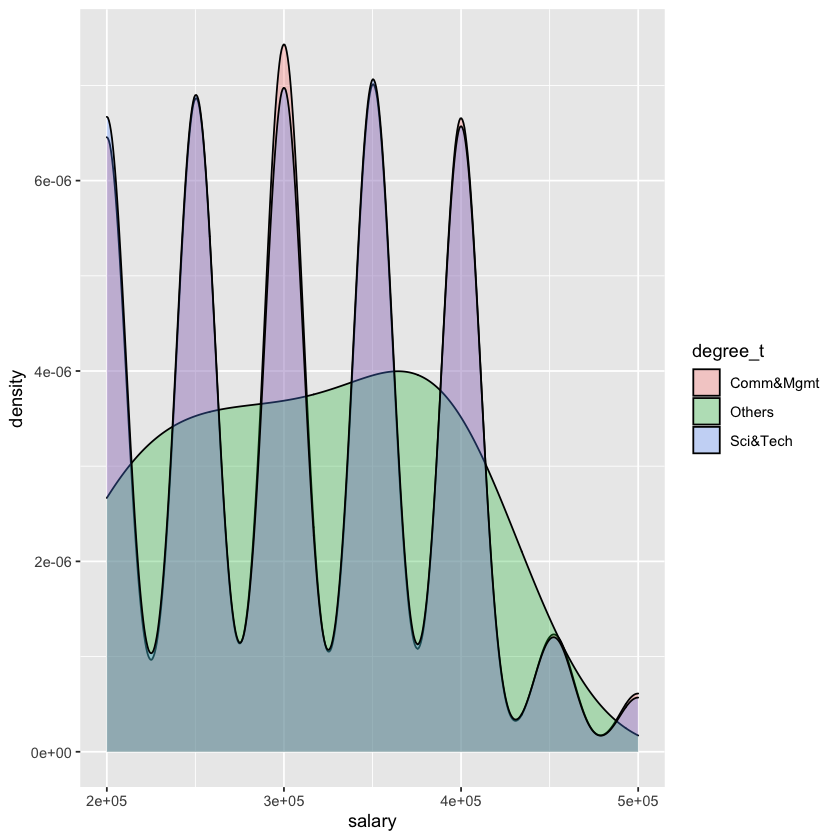

In [30]:
#Analysis9.1: The relationship between undergraduate degree field and salary
ggplot(data, aes(x=salary, fill=degree_t)) +
  geom_density(alpha=.3)

Don't know how to automatically pick scale for object of type impute. Defaulting to continuous.



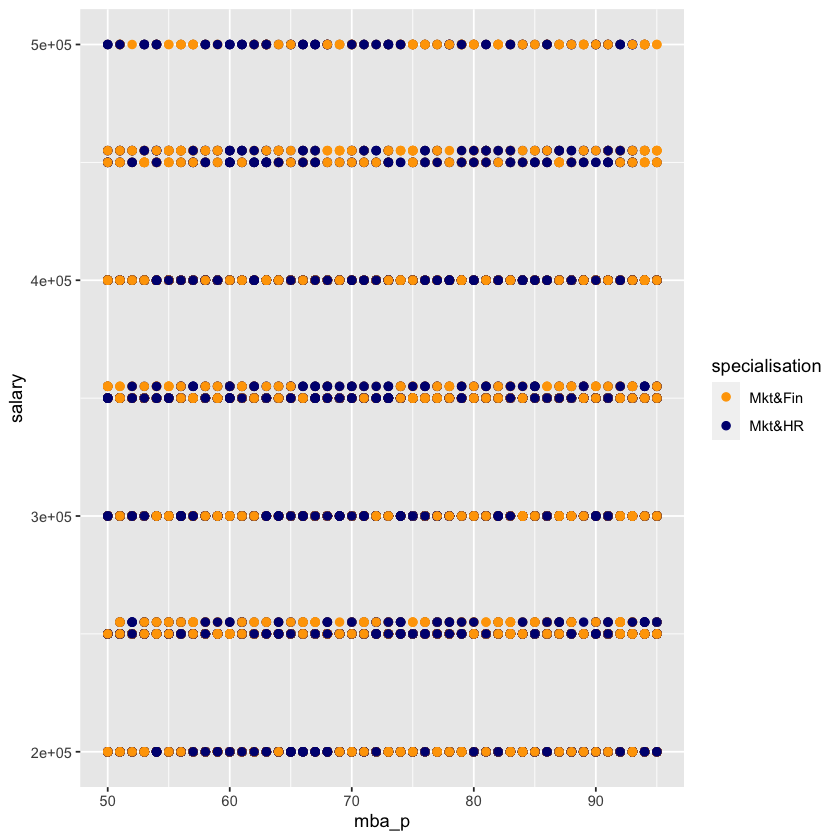

In [31]:
ggplot(data, aes(x=mba_p, y=salary, color=specialisation)) +
  scale_color_manual(values=c("orange", "navy")) +
  geom_point(size=2)

In [33]:
#Analysis9.2: Salary by degree type and gender
mytheme <- theme(plot.title=element_text(face="bold.italic",
                                         size="14", color="brown"),
                 axis.title=element_text(face="bold.italic",
                                         size=10, color="brown"),
                 axis.text=element_text(face="bold", size=9,
                                        color="darkblue"),
                 panel.background=element_rect(fill="white",
                                               color="darkblue"),
                 panel.grid.major.y=element_line(color="grey",
                                                 linetype=1),
                 panel.grid.minor.y=element_line(color="grey",
                                                 linetype=2),
                 panel.grid.minor.x=element_blank(),
                 legend.position="top")

Don't know how to automatically pick scale for object of type impute. Defaulting to continuous.



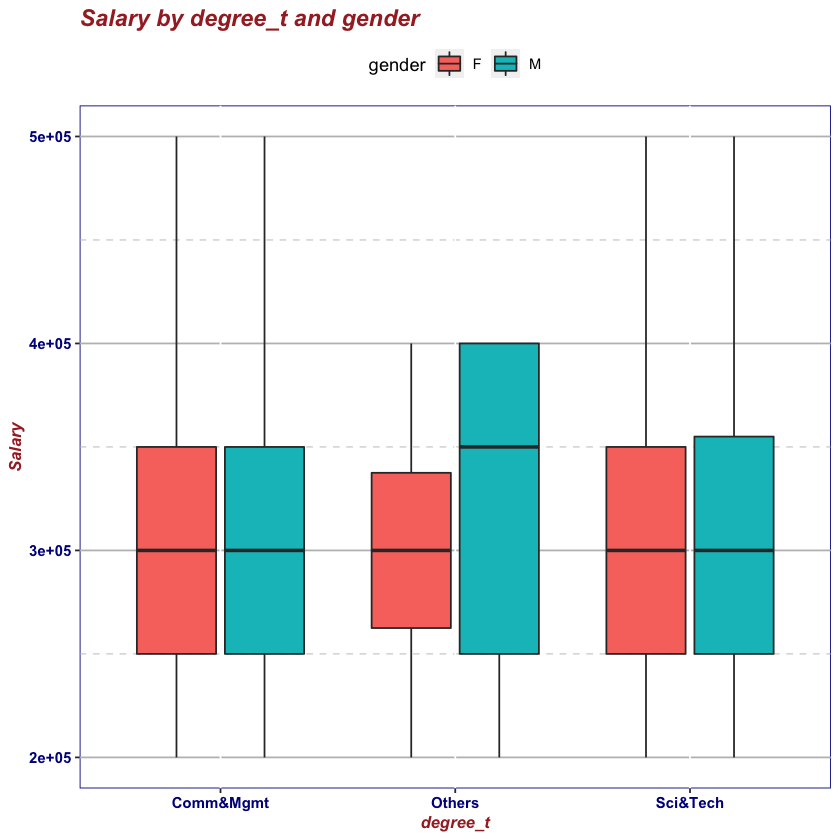

In [34]:
ggplot(data, aes(x=degree_t, y=salary, fill=gender)) +
  geom_boxplot() +
  labs(title="Salary by degree_t and gender", x="degree_t", y="Salary") +
  mytheme


Question10: Is the placement of students related to Employability test percentage?


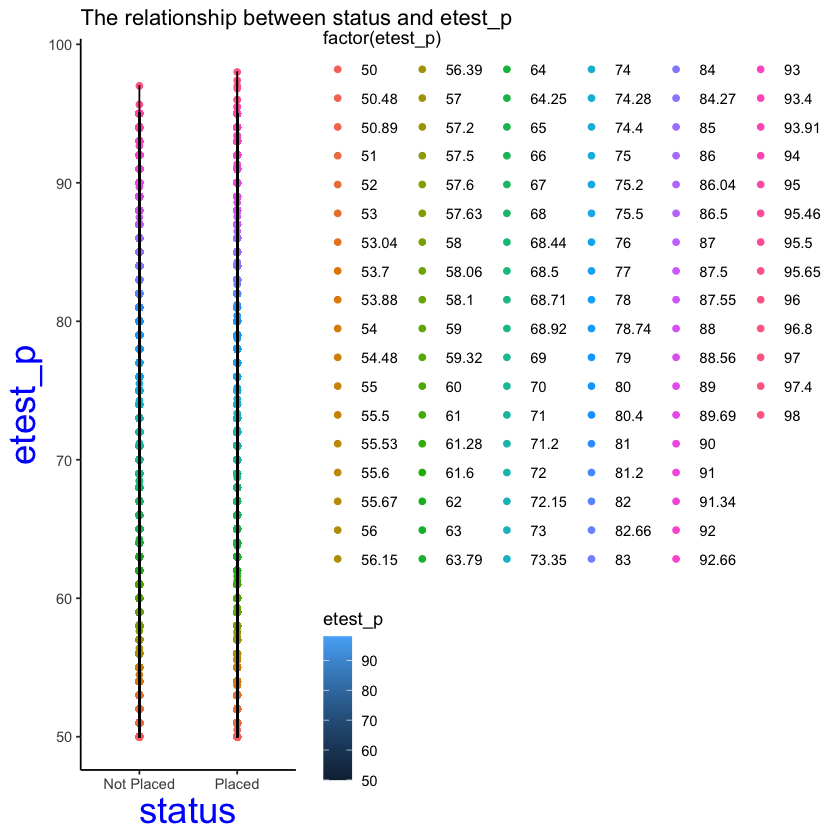

In [35]:
ggplot(data, aes(x = status, y= etest_p, fill = etest_p)) +
  geom_point(stat = "identity", aes(col = factor(etest_p)))+
  geom_line() +
  theme_classic() +
  labs(title = "The relationship between status and etest_p",
       x = "status",
       y = "etest_p")+
  theme(axis.title = element_text(size = rel(2),hjust = 0.5,
                                  color = "blue", lineheight = 1))